**NOTE**: Please run the cells in order. Variable names and other stuffs are assigned assuming the cells are run in order

## Summary
This dataset contains the results of health inspections conducted by the Department of Public Health from 2024 to Present. It includes the name and location of each facility inspected, the facility status (Pass, Conditional Pass, or Closure) after the inspection, and violations observed.


## Description of our dataset (2024 - Present)
* **inspection_date** (Floating Timestamp): Date and time when the inspection occurred.
* **inspector** (Text): Name of the inspector who conducted the inspection.
* **district** (Text): District in which the inspection took place.
* **subdistrict** (Text): Sub-district where the inspection was performed.
* **subsector** (Text): Specific sub-sector of the inspection area.
* **permit_number** (Text): Permit number associated with the facility, if applicable.
* **dba** (Text): “Doing Business As” name of the facility. Public trade name of the establishment.
* **permit_type** (Text): Type of permit held by the facility.
* **street_address** (Text): Street address of the facility.
* **street_address_clean** (Text): Cleaned and standardized street address.
* **inspection_type** (Text): Type/category of the inspection conducted.
* **inspection_frequency_type** (Text): Frequency classification of inspections.
* **total_time** (Number): Total duration of the inspection in minutes.
* **facility_rating_status** (Text): Rating status of the facility after inspection.
* **census** (Text): Census information linked to the facility location.
* **suspension_notes** (Text): Notes regarding any permit suspensions.
* **inspection_notes** (Text): Additional notes recorded during the inspection.
* **violation_count** (Number): Total number of violations observed.
* **violation_codes** (Text): Codes corresponding to the observed violations.
* **latitude** (Number): Latitude coordinate of the facility.
* **longitude** (Number): Longitude coordinate of the facility.
* **point** (Point): Geospatial point combining latitude and longitude.
* **analysis_neighborhood** (Text): Neighborhood used for analysis purposes.
* **supervisor_district** (Number): Supervisor district number for administrative purposes.
* **data_as_of** (Floating Timestamp): Date when the dataset was last updated in the source system.
* **data_loaded_at** (Floating Timestamp): Timestamp when the data was uploaded to the open data portal.

## Description of our dataset (2020 - 2023)

* **name**: Name of the business.
* **address**: Street address of the business.
* **city**: City where the business is located.
* **state**: State where the business is located.
* **postal_code**: Postal code of the business location.
* **latitude**: Latitude coordinate of the business.
* **longitude**: Longitude coordinate of the business.
* **inspection_id**: Unique identifier for each inspection.
* **date**: Date when the inspection was conducted (floating timestamp).
* **facility_status**: Status of the business based on the inspection.
* **inspection_type**: Type/category of inspection performed.
* **violation_observed**: Any violation observed during the inspection.
* **description**: Detailed description of the observed violation.
* **the_geom**: Geospatial point location of the business.



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from slugify import slugify
import glob
import re



In [2]:
df_raw_2024 = pd.read_csv("../data/raw/Health_Inspection(2024-Present).csv")
# os.getcwd()
print(df_raw_2024.columns.tolist())
display(df_raw_2024.head(2))

df_raw_2020 = pd.read_csv("../data/raw/Health_Inspection(2020-2023).csv")
# os.getcwd()
print(df_raw_2020.columns.tolist())
display(df_raw_2020.head(2))

['inspection_date', 'inspector', 'district', 'subdistrict', 'subsector', 'permit_number', 'dba', 'permit_type', 'street_address', 'street_address_clean', 'inspection_type', 'inspection_frequency_type', 'total_time', 'facility_rating_status', 'census', 'suspension_notes', 'inspection_notes', 'violation_count', 'violation_codes', 'latitude', 'longitude', 'point', 'analysis_neighborhood', 'supervisor_district', 'data_as_of', 'data_loaded_at']


,inspection_date,inspector,district,subdistrict,subsector,permit_number,dba,permit_type,street_address,street_address_clean,...,inspection_notes,violation_count,violation_codes,latitude,longitude,point,analysis_neighborhood,supervisor_district,data_as_of,data_loaded_at
0,2025/04/23 12:00:00 AM,William Bajjalieh,5,505,354,90873,ANDYTOWN COFFEE ROASTERS,"H24 - RESTAURANT UNDER 1,000 SQFT",3629 TARAVAL,3629 TARAVAL,...,NaN,NaN,NaN,37.741728,-122.504987,POINT (-122.504986861 37.741728156),Sunset/Parkside,4.0,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM
1,2025/04/23 12:00:00 AM,Zack Parsons,1,103,607,06734876,Mission St Taqueria/The Cove/Wine Bar Field Club,H36 - STADIUM CONCESSIONS (PERM),24 WILLIE MAYS PLZ # FIELD,3RD ST & KING ST,...,NaN,1.0,"114074, 114081, 114119, 114121, 114161, 114178...",37.778130,-122.391855,POINT (-122.391855 37.77813),Mission Bay,6.0,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM


['name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'inspection_id', 'date', 'facility_status', 'inspection_type', 'violation_observed', 'description', 'the_geom']


,name,address,city,state,postal_code,latitude,longitude,inspection_id,date,facility_status,inspection_type,violation_observed,description,the_geom
0,BLUE DANUBE COFFEE HOUSE,306 CLEMENT ST,San Francisco,CA,94118,37.783058,-122.462502,225620200309,2020 Mar 09 12:00:00 AM,PASS,routine,Minor,"No insects, rodents, birds or nonservice anima...",POINT (-122.462502 37.783058)
1,BLUE DANUBE COFFEE HOUSE,306 CLEMENT ST,San Francisco,CA,94118,37.783058,-122.462502,225620200309,2020 Mar 09 12:00:00 AM,PASS,routine,OUT (Not in Compliance),"Equipment approved; clean; installed, good rep...",POINT (-122.462502 37.783058)


In [3]:
df_raw_2024.shape

(19545, 26)

In [4]:
df_raw_2020.shape

(49562, 14)

In [5]:

raw_dir = "../data/raw"
clean_dir = "../data/clean"

os.makedirs(clean_dir, exist_ok=True)
csv_paths = glob.glob(os.path.join(raw_dir, "*.csv"))
print(csv_paths)

['../data/raw\\Analysis_Neighborhoods_to_ZIP_Code_Crosswalk_20251220.csv', '../data/raw\\copyTest.csv', '../data/raw\\Health_Inspection(2020-2023).csv', '../data/raw\\Health_Inspection(2024-Present).csv', '../data/raw\\health_inspections_data.csv', '../data/raw\\Merged_dataset.csv', '../data/raw\\merged_HealthInspections.csv', '../data/raw\\sf_restaurants_google.csv', '../data/raw\\synthetic_samples.csv', '../data/raw\\toy_gan_data.csv']


In [6]:
def strip_string_cells(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for col in df.select_dtypes(include=["object", "string"]).columns:
        df[col] = df[col].astype(str).str.strip()
    return df

In [7]:
def clean_column_names(df: pd.DataFrame) -> pd.DataFrame:
    """
    Make all column names:
    - stripped (no leading/trailing spaces)
    - lowercase
    - spaces replaced with underscore
    """
    df = df.copy()
    df.columns = [
        re.sub(r"\s+", "_", col.strip().lower())
        for col in df.columns
    ]
    return df

In [8]:
def canonicalize_address(addr: str) -> str:
    """
    Robust normalization of addresses:
    - lowercase
    - replace all common street suffixes (even if at end of string)
    - remove punctuation and normalize via slugify
    - remove unit/suite markers for matching
    """
    if pd.isna(addr):
        return ""
    s = str(addr).strip().lower()

    
    s = s.replace("#", " ")      
    s = s.replace(" unit ", " ")
    s = s.replace(" ste ", " ")
    s = s.replace(" suite ", " ")

    suffix_map = {
        " st": " street",
        " st,": " street",
        " st.": " street",
        " rd": " road",
        " rd.": " road",
        " ave": " avenue",
        " ave.": " avenue",
        " ave,": " avenue",
        " blvd": " boulevard",
        " dr": " drive",
        " dr.": " drive",
        " plz": " plaza",
        " pl": " place",
        " hwy": " highway",
        " street": " street",
        " road": " road",
        " place": " place",
    }

    
    for old, new in suffix_map.items():
        if s.endswith(old):
            s = s[: -len(old)] + new
        s = s.replace(old + " ", new + " ")
        s = s.replace(" " + old + " ", " " + new + " ")

    
    s = " ".join(s.split())

    
    s = slugify(s, lowercase=True, separator=' ')

    return s





In [9]:
def canonicalize_name(name: str) -> str:
    """Normalize restaurant names for matching"""
    if pd.isna(name):
        return ""
    s = str(name).strip().lower()
    
    # Remove common suffixes/prefixes
    patterns_to_remove = [
        r"\s*-\s*walk\s*thru\s*$",
        r"\s*restaurant\s*$",
        r"\s*cafe\s*$",
        r"\s*inc\s*$",
        r"\s*llc\s*$",
        r"\s*\(.*\)\s*",  # Remove parenthetical content
    ]
    
    for pattern in patterns_to_remove:
        s = re.sub(pattern, "", s, flags=re.IGNORECASE)
    
    # Normalize and slugify
    s = " ".join(s.split())
    s = slugify(s, lowercase=True, separator=' ')
    
    return s

In [10]:
def clean_inspection_df(df: pd.DataFrame) -> pd.DataFrame:
    df = clean_column_names(df)
    df = strip_string_cells(df)

    
    source_col = None
    if "street_address_clean" in df.columns:
        source_col = "street_address_clean"
    elif "address" in df.columns:
        source_col = "address"

    if source_col is not None:
        df["canonical_address"] = df[source_col].apply(canonicalize_address)
        
    name_col = None
    if "dba" in df.columns:
        name_col = "dba"
    elif "name" in df.columns:
        name_col = "name"
    
    if name_col is not None:
        df["canonical_name"] = df[name_col].apply(canonicalize_name)
        
    # Define a mapping of incorrect/spelling variants to the correct labels
    if "facility_status" in df.columns:
        target_corrections = {
        "PASS" : "Pass",
        "CONDITIIONAL PASS": "Conditional Pass",
        "CONDITIONA PASS": "Conditional Pass",
        "CONDITONAL PASS": "Conditional Pass",
        "CONDITIONAL PASS" : "Conditional Pass",
        "CLOSURE" : "Closure"
        }
    
        # Apply corrections
        df['facility_status'] = df['facility_status'].replace(target_corrections)
    
    return df

In [11]:
name_map = {
    "Health_Inspection_Scores_(2024-Present).csv": "sf_2024_present_cleaned.csv",
    "Health_Inspection_Scores_(2020-2023).csv": "sf_2020_2023_cleaned.csv",
    "sf_restaurants_google.csv": "google_cleaned.csv",
}

address_col_map = {
    "Health_Inspection_Scores_(2024-Present)_20251030.csv": "street_address_clean",
    "Health_Inspection_Scores_(2020-2023).csv": "address",
    "sf_restaurants_google.csv": "address",
}

for path in glob.glob(os.path.join(raw_dir, "*.csv")):
    filename = os.path.basename(path)
    print("Cleaning:", filename)

    df = pd.read_csv(path, encoding="latin1")  # adjust if needed
    address_col = address_col_map.get(filename)
    df_clean = clean_inspection_df(df)

    out_name = name_map.get(filename, f"{os.path.splitext(filename)[0]}.csv")
    out_path = os.path.join(clean_dir, out_name)

    df_clean.to_csv(out_path, index=False)
    print("  -> saved to", out_path)

Cleaning: Analysis_Neighborhoods_to_ZIP_Code_Crosswalk_20251220.csv
  -> saved to ../data/clean\Analysis_Neighborhoods_to_ZIP_Code_Crosswalk_20251220.csv
Cleaning: copyTest.csv
  -> saved to ../data/clean\copyTest.csv
Cleaning: Health_Inspection(2020-2023).csv
  -> saved to ../data/clean\Health_Inspection(2020-2023).csv
Cleaning: Health_Inspection(2024-Present).csv
  -> saved to ../data/clean\Health_Inspection(2024-Present).csv
Cleaning: health_inspections_data.csv
  -> saved to ../data/clean\health_inspections_data.csv
Cleaning: Merged_dataset.csv
  -> saved to ../data/clean\Merged_dataset.csv
Cleaning: merged_HealthInspections.csv
  -> saved to ../data/clean\merged_HealthInspections.csv
Cleaning: sf_restaurants_google.csv
  -> saved to ../data/clean\google_cleaned.csv
Cleaning: synthetic_samples.csv
  -> saved to ../data/clean\synthetic_samples.csv
Cleaning: toy_gan_data.csv
  -> saved to ../data/clean\toy_gan_data.csv


In [12]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth',200)

In [13]:
df_org_2024 = pd.read_csv("../data/clean/sf_2024_present_cleaned.csv")
df_org_2020 = pd.read_csv("../data/clean/Health_Inspection(2020-2023).csv")

In [14]:
df_org_2024

,inspection_date,inspector,district,subdistrict,subsector,permit_number,dba,permit_type,street_address,street_address_clean,inspection_type,inspection_frequency_type,total_time,facility_rating_status,census,suspension_notes,inspection_notes,violation_count,violation_codes,latitude,longitude,point,analysis_neighborhood,supervisor_district,data_as_of,data_loaded_at,canonical_address,canonical_name
0,2025/04/23 12:00:00 AM,William Bajjalieh,5,505,354,90873,ANDYTOWN COFFEE ROASTERS,"H24 - RESTAURANT UNDER 1,000 SQFT",3629 TARAVAL,3629 TARAVAL,Routine,1,45,Pass,354,NaN,NaN,NaN,NaN,37.741728,-122.504987,POINT (-122.504986861 37.741728156),Sunset/Parkside,4.0,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM,3629 taraval,andytown coffee roasters
1,2025/04/23 12:00:00 AM,Zack Parsons,1,103,607,06734876,Mission St Taqueria/The Cove/Wine Bar Field Club,H36 - STADIUM CONCESSIONS (PERM),24 WILLIE MAYS PLZ # FIELD,3RD ST & KING ST,Routine,1,150,Pass,STADIUM,NaN,NaN,1.0,"114074, 114081, 114119, 114121, 114161, 114178, 114179, 114083, 114185, 114185.2, 114185.3, 114185.4, 114185.5 - All clean and soiled linen shall be properly stored; non-food items shall be stored...",37.778130,-122.391855,POINT (-122.391855 37.77813),Mission Bay,6.0,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM,3rd street king street,mission st taqueria the cove wine bar field club
2,2025/04/23 12:00:00 AM,Zack Parsons,No District,No Sub District,No Sub Sector,06743895,DAYC CONFECTIONERY LLC,H98 - COTTAGE FOOD OPERATIONS - TIER A (DIRECT SALES),660 INDIANA ST APT 101,660 INDIANA ST,New Ownership (I),NaN,60,Pass,CFO-A,NaN,NaN,NaN,NaN,37.762479,-122.391828,POINT (-122.391828 37.762479),Potrero Hill,10.0,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM,660 indiana street,dayc confectionery
3,2025/04/22 12:00:00 AM,Amelia Castelli,4,401,155,75086,DAISO USA LLC,H04 - RETAIL MKTS W/O PREP (5001 - 10000),22 PEACE PZ 400,22 PEACE PZ 400,Routine,1,60,Pass,155,NaN,NaN,NaN,NaN,37.785172,-122.428706,POINT (-122.42870601 37.785172005),Japantown,5.0,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM,22 peace pz 400,daiso usa
4,2025/04/22 12:00:00 AM,Christina Lee,2,203,114B,06743837,S & M GINSENG INC,H03 - RETAIL MKTS W/O PREP (UNDER 5001),919 GRANT AVE,919 GRANT AVE,New Ownership (R),NaN,60,Pass,114B,NaN,NaN,NaN,NaN,37.795482,-122.406871,POINT (-122.4068715 37.795482),Chinatown,3.0,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM,919 grant avenue,s m ginseng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19540,2024/08/08 12:00:00 AM,William Bajjalieh,5,501,426,51954,VOLCANO KITCHEN,"H25 - RESTAURANT 1,000 - 2,000 SQFT",5454 GEARY BLVD,5454 GEARY BLVD,Reinspection,2,15,Pass,426,NaN,NaN,NaN,NaN,37.780677,-122.478039,POINT (-122.478039 37.780677),Outer Richmond,1.0,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM,5454 geary boulevard,volcano kitchen
19541,2024/11/20 12:00:00 AM,Joanna Huber,No District,No Sub District,No Sub Sector,06734797,"HUDSON ONE FERRY OPERATING, L.P.",H33 - COMMISSARIES,11601 WILSHIRE BLVD STE 900,11601 WILSHIRE BLVD,New Ownership (I),2,30,Pass,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM,11601 wilshire boulevard,hudson one ferry operating l p
19542,2024/10/15 12:00:00 AM,Christina Lee,1,103,607,06734939,BON DELIRE,"H25 - RESTAURANT 1,000 - 2,000 SQFT",PIER THE EMBARCADERO ST,PIER THE EMBARCADERO ST,NaN,2,60,Pass,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025/07/01 10:09:15 AM,2025/12/12 02:34:11 AM,pier the embarcadero street,bon delire
19543,2024/08/26 12:00:00 AM,Michael Mooney,No District,No Sub District,No Sub Sector,H0706732467,MV HYDRUS,H07 - RETAIL MKTS W/FOOD PREP (UNDER 5001),PIER FISHERMANS WHARF PIER,PIER FISHERMANS WHARF PIER,Routine,1,15,Pass,106,NaN,NaN,3.0,"114130-114130.5, 114132, 114133, 114137, 114139, 114153, 114163, 114165, 114167, 114169, 114175, 114177, 114180, 114182 - Ensure all equipment is approved, properly installed, clean, and maintaine...",NaN,Na

In [15]:
df_org_2020

,name,address,city,state,postal_code,latitude,longitude,inspection_id,date,facility_status,inspection_type,violation_observed,description,the_geom,canonical_address,canonical_name
0,BLUE DANUBE COFFEE HOUSE,306 CLEMENT ST,San Francisco,CA,94118,37.783058,-122.462502,225620200309,2020 Mar 09 12:00:00 AM,Pass,routine,Minor,"No insects, rodents, birds or nonservice animals [ date violation corrected: 3/11/2021 ]",POINT (-122.462502 37.783058),306 clement street,blue danube coffee house
1,BLUE DANUBE COFFEE HOUSE,306 CLEMENT ST,San Francisco,CA,94118,37.783058,-122.462502,225620200309,2020 Mar 09 12:00:00 AM,Pass,routine,OUT (Not in Compliance),"Equipment approved; clean; installed, good repair; capacity [ date violation corrected: 3/11/2021 ]",POINT (-122.462502 37.783058),306 clement street,blue danube coffee house
2,BLUE DANUBE COFFEE HOUSE,306 CLEMENT ST,San Francisco,CA,94118,37.783058,-122.462502,225620200309,2020 Mar 09 12:00:00 AM,Pass,routine,OUT (Not in Compliance),Premises; personal/cleaning items; vermin proofing [ date violation corrected: 3/11/2021 ],POINT (-122.462502 37.783058),306 clement street,blue danube coffee house
3,CAFE INTERNATIONAL,508 HAIGHT ST,San Francisco,CA,94117,37.772097,-122.430814,238520200309,2020 Mar 09 12:00:00 AM,Closure,routine,Major,Proper cooling methods [ date violation corrected: 3/9/2020 ],POINT (-122.430814 37.772097),508 haight street,cafe international
4,CAFE INTERNATIONAL,508 HAIGHT ST,San Francisco,CA,94117,37.772097,-122.430814,238520200309,2020 Mar 09 12:00:00 AM,Closure,routine,Minor,Food Safety Manager Certification and Food Handler Card [ date violation corrected: 9/8/2021 ],POINT (-122.430814 37.772097),508 haight street,cafe international
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49557,AK SUBS,397 08TH ST,San Francisco,CA,94103,37.773884,-122.408631,453120230803,2023 Aug 03 12:00:00 AM,Pass,routine,Minor,Food Safety Manager Certification and Food Handler Card,POINT (-122.408631 37.773884),397 08th street,ak subs
49558,AK SUBS,397 08TH ST,San Francisco,CA,94103,37.773884,-122.408631,453120230803,2023 Aug 03 12:00:00 AM,Pass,routine,OUT (Not in Compliance),"Equipment approved; clean; installed, good repair; capacity",POINT (-122.408631 37.773884),397 08th street,ak subs
49559,AK SUBS,397 08TH ST,San Francisco,CA,94103,37.773884,-122.408631,453120230803,2023 Aug 03 12:00:00 AM,Pass,routine,OUT (Not in Compliance),"Floors, walls and ceiling: build, maintianed & clean",POINT (-122.408631 37.773884),397 08th street,ak subs
49560,AK SUBS,397 08TH ST,San Francisco,CA,94103,37.773884,-122.408631,453120230803,2023 Aug 03 12:00:00 AM,Pass,routine,OUT (Not in Compliance),Food separated and protected,POINT (-122.408631 37.773884),397 08th street,ak subs


In [16]:
df_org_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49562 entries, 0 to 49561
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                49562 non-null  object 
 1   address             49554 non-null  object 
 2   city                49562 non-null  object 
 3   state               49562 non-null  object 
 4   postal_code         48679 non-null  object 
 5   latitude            19353 non-null  float64
 6   longitude           19353 non-null  float64
 7   inspection_id       49562 non-null  int64  
 8   date                49562 non-null  object 
 9   facility_status     49562 non-null  object 
 10  inspection_type     49562 non-null  object 
 11  violation_observed  43825 non-null  object 
 12  description         43825 non-null  object 
 13  the_geom            19353 non-null  object 
 14  canonical_address   49554 non-null  object 
 15  canonical_name      49562 non-null  object 
dtypes: f

In [17]:
#Let'see the percentage of null values
(df_org_2020.isnull().sum()).sort_values(ascending=False)/len(df_org_2020)

latitude              0.609519
longitude             0.609519
the_geom              0.609519
violation_observed    0.115754
description           0.115754
postal_code           0.017816
address               0.000161
canonical_address     0.000161
name                  0.000000
city                  0.000000
state                 0.000000
inspection_id         0.000000
date                  0.000000
facility_status       0.000000
inspection_type       0.000000
canonical_name        0.000000
dtype: float64

In [18]:
df_org_2020['violation_observed'].value_counts(normalize=True)

OUT (Not in Compliance)                        0.455608
Minor                                          0.230439
Minor - Corrected on Site                      0.125203
Major - Corrected on Site                      0.108135
OUT (Not in Compliance) - Corrected on Site    0.064073
Major                                          0.016543
Name: violation_observed, dtype: float64

In [19]:
# subset rows where violation_observed is missing
na_subset = df_org_2020[df_org_2020["violation_observed"].isna()]

# distribution of target variable for those rows
na_subset["facility_status"].value_counts(normalize=True)


Pass                0.993028
Closure             0.005055
Conditional Pass    0.001917
Name: facility_status, dtype: float64

In [20]:
#Since 99% of values has Pass, it makes more sense to put violation_observed as 0 than imputing it with mode
# ordinal encoding for violation_observed with explicit missing handling

severity_map = {
    "Minor - Corrected on Site": 1,
    "Minor": 2,
    "Major - Corrected on Site": 3,
    "Major": 4,
    "OUT (Not in Compliance) - Corrected on Site": 5,
    "OUT (Not in Compliance)": 6
}


# ordinal severity encoding
df_org_2020["violation_observed"] = (
    df_org_2020["violation_observed"]
    .map(severity_map)
    .fillna(0)
)



In [21]:
#Let'see the percentage of null values
(df_org_2020.isnull().sum()).sort_values(ascending=False)/len(df_org_2020)

latitude              0.609519
longitude             0.609519
the_geom              0.609519
description           0.115754
postal_code           0.017816
address               0.000161
canonical_address     0.000161
name                  0.000000
city                  0.000000
state                 0.000000
inspection_id         0.000000
date                  0.000000
facility_status       0.000000
inspection_type       0.000000
violation_observed    0.000000
canonical_name        0.000000
dtype: float64

In [22]:
#Let'see the percentage of null values
(df_org_2024.isnull().sum()).sort_values(ascending=False)/len(df_org_2024)

inspection_notes             1.000000
suspension_notes             1.000000
violation_codes              0.462318
violation_count              0.462318
facility_rating_status       0.154106
inspection_type              0.146943
census                       0.098388
canonical_name               0.071476
dba                          0.071476
inspection_frequency_type    0.038117
supervisor_district          0.009363
analysis_neighborhood        0.009363
latitude                     0.007061
longitude                    0.007061
point                        0.007061
total_time                   0.003888
subsector                    0.001637
permit_number                0.000921
subdistrict                  0.000716
district                     0.000102
canonical_address            0.000000
data_loaded_at               0.000000
data_as_of                   0.000000
street_address               0.000000
street_address_clean         0.000000
inspector                    0.000000
permit_type 

In [23]:
# Percentage of rows with null violation codes that are Pass
null_violation_count_pass = df_org_2024[df_org_2024['violation_count'].isna()]['facility_rating_status'].value_counts(normalize=True) * 100
print(null_violation_count_pass)


Pass                99.724897
Conditional Pass     0.165062
Closure              0.110041
Name: facility_rating_status, dtype: float64


In [24]:
# Fill nulls in violation_count with 0
df_org_2024['violation_count'] = np.where(df_org_2024['violation_count'].isnull(), 0, df_org_2024['violation_count'])


In [25]:
#Let'see the percentage of null values
(df_org_2024.isnull().sum()).sort_values(ascending=False)/len(df_org_2024)

inspection_notes             1.000000
suspension_notes             1.000000
violation_codes              0.462318
facility_rating_status       0.154106
inspection_type              0.146943
census                       0.098388
canonical_name               0.071476
dba                          0.071476
inspection_frequency_type    0.038117
supervisor_district          0.009363
analysis_neighborhood        0.009363
latitude                     0.007061
longitude                    0.007061
point                        0.007061
total_time                   0.003888
subsector                    0.001637
permit_number                0.000921
subdistrict                  0.000716
district                     0.000102
permit_type                  0.000000
canonical_address            0.000000
data_loaded_at               0.000000
data_as_of                   0.000000
violation_count              0.000000
street_address               0.000000
inspector                    0.000000
street_addre

In [26]:
#Merge two Datasets
df_2020 = df_org_2020.rename(columns={
    'name': 'dba',
    'address': 'street_address',
    'date': 'inspection_date',
    'inspection_type': 'inspection_type',
    'facility_status': 'facility_rating_status',
    'description': 'violation_codes',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'canonical_address' : 'address',
    'canonical_name' : 'name',
    'the_geom' : 'point'
})

df_2024 = df_org_2024.rename(columns={
    'dba': 'dba',
    'street_address': 'street_address',
    'inspection_date': 'inspection_date',
    'inspection_type': 'inspection_type',
    'facility_rating_status': 'facility_rating_status',
    'violation_count': 'violation_count',
    'violation_codes': 'violation_codes',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'canonical_address' : 'address',
    'canonical_name' : 'name'
})

columns_to_drop_2020 = [
    'city', 'state', 'postal_code', 'inspection_id', 'street_address', 'dba'
]


df_2020 = df_2020.drop(columns_to_drop_2020, axis = 1)

cols_to_drop_2024 = ['dba', 'street_address', 'inspector', 'district', 'subdistrict', 'subsector', 'permit_number',
                    'permit_type', 'street_address_clean', 'inspection_frequency_type', 'total_time', 'census', 'suspension_notes',
                    'inspection_notes', 'supervisor_district', 'data_as_of', 'data_loaded_at']

df_2024 = df_2024.drop(cols_to_drop_2024, axis = 1)


In [27]:
df_2020

,latitude,longitude,inspection_date,facility_rating_status,inspection_type,violation_observed,violation_codes,point,address,name
0,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,2.0,"No insects, rodents, birds or nonservice animals [ date violation corrected: 3/11/2021 ]",POINT (-122.462502 37.783058),306 clement street,blue danube coffee house
1,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,6.0,"Equipment approved; clean; installed, good repair; capacity [ date violation corrected: 3/11/2021 ]",POINT (-122.462502 37.783058),306 clement street,blue danube coffee house
2,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,6.0,Premises; personal/cleaning items; vermin proofing [ date violation corrected: 3/11/2021 ],POINT (-122.462502 37.783058),306 clement street,blue danube coffee house
3,37.772097,-122.430814,2020 Mar 09 12:00:00 AM,Closure,routine,4.0,Proper cooling methods [ date violation corrected: 3/9/2020 ],POINT (-122.430814 37.772097),508 haight street,cafe international
4,37.772097,-122.430814,2020 Mar 09 12:00:00 AM,Closure,routine,2.0,Food Safety Manager Certification and Food Handler Card [ date violation corrected: 9/8/2021 ],POINT (-122.430814 37.772097),508 haight street,cafe international
...,...,...,...,...,...,...,...,...,...,...
49557,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,2.0,Food Safety Manager Certification and Food Handler Card,POINT (-122.408631 37.773884),397 08th street,ak subs
49558,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,"Equipment approved; clean; installed, good repair; capacity",POINT (-122.408631 37.773884),397 08th street,ak subs
49559,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,"Floors, walls and ceiling: build, maintianed & clean",POINT (-122.408631 37.773884),397 08th street,ak subs
49560,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,Food separated and protected,POINT (-122.408631 37.773884),397 08th street,ak subs


In [28]:
df_2024

,inspection_date,inspection_type,facility_rating_status,violation_count,violation_codes,latitude,longitude,point,analysis_neighborhood,address,name
0,2025/04/23 12:00:00 AM,Routine,Pass,0.0,NaN,37.741728,-122.504987,POINT (-122.504986861 37.741728156),Sunset/Parkside,3629 taraval,andytown coffee roasters
1,2025/04/23 12:00:00 AM,Routine,Pass,1.0,"114074, 114081, 114119, 114121, 114161, 114178, 114179, 114083, 114185, 114185.2, 114185.3, 114185.4, 114185.5 - All clean and soiled linen shall be properly stored; non-food items shall be stored...",37.778130,-122.391855,POINT (-122.391855 37.77813),Mission Bay,3rd street king street,mission st taqueria the cove wine bar field club
2,2025/04/23 12:00:00 AM,New Ownership (I),Pass,0.0,NaN,37.762479,-122.391828,POINT (-122.391828 37.762479),Potrero Hill,660 indiana street,dayc confectionery
3,2025/04/22 12:00:00 AM,Routine,Pass,0.0,NaN,37.785172,-122.428706,POINT (-122.42870601 37.785172005),Japantown,22 peace pz 400,daiso usa
4,2025/04/22 12:00:00 AM,New Ownership (R),Pass,0.0,NaN,37.795482,-122.406871,POINT (-122.4068715 37.795482),Chinatown,919 grant avenue,s m ginseng
...,...,...,...,...,...,...,...,...,...,...,...
19540,2024/08/08 12:00:00 AM,Reinspection,Pass,0.0,NaN,37.780677,-122.478039,POINT (-122.478039 37.780677),Outer Richmond,5454 geary boulevard,volcano kitchen
19541,2024/11/20 12:00:00 AM,New Ownership (I),Pass,0.0,NaN,NaN,NaN,NaN,NaN,11601 wilshire boulevard,hudson one ferry operating l p
19542,2024/10/15 12:00:00 AM,NaN,Pass,0.0,NaN,NaN,NaN,NaN,NaN,pier the embarcadero street,bon delire
19543,2024/08/26 12:00:00 AM,Routine,Pass,3.0,"114130-114130.5, 114132, 114133, 114137, 114139, 114153, 114163, 114165, 114167, 114169, 114175, 114177, 114180, 114182 - Ensure all equipment is approved, properly installed, clean, and maintaine...",NaN,NaN,NaN,NaN,pier fishermans wharf pier,mv hydrus


In [29]:
df_2020['violation_count'] = np.nan
df_2020['analysis_neighborhood'] = np.nan

In [30]:
# normalize ZIP
df_org_2020["postal_code_5"] = (
    df_org_2020["postal_code"]
    .astype(str)
    .str.extract(r"(\d{5})")
)

In [31]:
df_org_2020['postal_code_5'].unique()

array(['94118', '94117', '94110', '94102', '94111', '94105', '94112', nan,
       '94103', '94104', '94116', '94133', '94127', '94108', '94121',
       '94114', '94122', '94132', '94109', '94123', '94124', '94134',
       '94115', '94131', '94107', '94158', '94101', '94403', '92672',
       '94621', '94130', '94544', '94301', '94113', '94518', '94143',
       '94534', '94129', '94080', '94019', '94157', '94013', '94141',
       '94015', '94106', '94602', '95476'], dtype=object)

In [32]:
gov = pd.read_csv(r"..\data\raw\Analysis_Neighborhoods_to_ZIP_Code_Crosswalk_20251220.csv").rename(columns={
    "zip_code": "postal_code_5",
    "nhood": "analysis_neighborhood"
})

gov["postal_code_5"] = gov["postal_code_5"].astype(str).str[:5]


In [33]:
df_org_2020 = df_org_2020.merge(gov[["postal_code_5", "analysis_neighborhood"]],
              on="postal_code_5",
              how="left",
              suffixes=("", "_zip"))


In [34]:
df_2020['analysis_neighborhood'] = df_org_2020['analysis_neighborhood']

In [35]:
df_2020


,latitude,longitude,inspection_date,facility_rating_status,inspection_type,violation_observed,violation_codes,point,address,name,violation_count,analysis_neighborhood
0,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,2.0,"No insects, rodents, birds or nonservice animals [ date violation corrected: 3/11/2021 ]",POINT (-122.462502 37.783058),306 clement street,blue danube coffee house,NaN,Presidio Heights
1,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,6.0,"Equipment approved; clean; installed, good repair; capacity [ date violation corrected: 3/11/2021 ]",POINT (-122.462502 37.783058),306 clement street,blue danube coffee house,NaN,Presidio
2,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,6.0,Premises; personal/cleaning items; vermin proofing [ date violation corrected: 3/11/2021 ],POINT (-122.462502 37.783058),306 clement street,blue danube coffee house,NaN,Outer Richmond
3,37.772097,-122.430814,2020 Mar 09 12:00:00 AM,Closure,routine,4.0,Proper cooling methods [ date violation corrected: 3/9/2020 ],POINT (-122.430814 37.772097),508 haight street,cafe international,NaN,Lone Mountain/USF
4,37.772097,-122.430814,2020 Mar 09 12:00:00 AM,Closure,routine,2.0,Food Safety Manager Certification and Food Handler Card [ date violation corrected: 9/8/2021 ],POINT (-122.430814 37.772097),508 haight street,cafe international,NaN,Seacliff
...,...,...,...,...,...,...,...,...,...,...,...,...
49557,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,2.0,Food Safety Manager Certification and Food Handler Card,POINT (-122.408631 37.773884),397 08th street,ak subs,NaN,Haight Ashbury
49558,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,"Equipment approved; clean; installed, good repair; capacity",POINT (-122.408631 37.773884),397 08th street,ak subs,NaN,Golden Gate Park
49559,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,"Floors, walls and ceiling: build, maintianed & clean",POINT (-122.408631 37.773884),397 08th street,ak subs,NaN,Inner Richmond
49560,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,Food separated and protected,POINT (-122.408631 37.773884),397 08th street,ak subs,NaN,West of Twin Peaks


In [36]:
df_org_2020['postal_code_5'].unique()

array(['94118', '94117', '94110', '94102', '94111', '94105', '94112', nan,
       '94103', '94104', '94116', '94133', '94127', '94108', '94121',
       '94114', '94122', '94132', '94109', '94123', '94124', '94134',
       '94115', '94131', '94107', '94158', '94101', '94403', '92672',
       '94621', '94130', '94544', '94301', '94113', '94518', '94143',
       '94534', '94129', '94080', '94019', '94157', '94013', '94141',
       '94015', '94106', '94602', '95476'], dtype=object)

In [37]:
df_2020

,latitude,longitude,inspection_date,facility_rating_status,inspection_type,violation_observed,violation_codes,point,address,name,violation_count,analysis_neighborhood
0,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,2.0,"No insects, rodents, birds or nonservice animals [ date violation corrected: 3/11/2021 ]",POINT (-122.462502 37.783058),306 clement street,blue danube coffee house,NaN,Presidio Heights
1,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,6.0,"Equipment approved; clean; installed, good repair; capacity [ date violation corrected: 3/11/2021 ]",POINT (-122.462502 37.783058),306 clement street,blue danube coffee house,NaN,Presidio
2,37.783058,-122.462502,2020 Mar 09 12:00:00 AM,Pass,routine,6.0,Premises; personal/cleaning items; vermin proofing [ date violation corrected: 3/11/2021 ],POINT (-122.462502 37.783058),306 clement street,blue danube coffee house,NaN,Outer Richmond
3,37.772097,-122.430814,2020 Mar 09 12:00:00 AM,Closure,routine,4.0,Proper cooling methods [ date violation corrected: 3/9/2020 ],POINT (-122.430814 37.772097),508 haight street,cafe international,NaN,Lone Mountain/USF
4,37.772097,-122.430814,2020 Mar 09 12:00:00 AM,Closure,routine,2.0,Food Safety Manager Certification and Food Handler Card [ date violation corrected: 9/8/2021 ],POINT (-122.430814 37.772097),508 haight street,cafe international,NaN,Seacliff
...,...,...,...,...,...,...,...,...,...,...,...,...
49557,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,2.0,Food Safety Manager Certification and Food Handler Card,POINT (-122.408631 37.773884),397 08th street,ak subs,NaN,Haight Ashbury
49558,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,"Equipment approved; clean; installed, good repair; capacity",POINT (-122.408631 37.773884),397 08th street,ak subs,NaN,Golden Gate Park
49559,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,"Floors, walls and ceiling: build, maintianed & clean",POINT (-122.408631 37.773884),397 08th street,ak subs,NaN,Inner Richmond
49560,37.773884,-122.408631,2023 Aug 03 12:00:00 AM,Pass,routine,6.0,Food separated and protected,POINT (-122.408631 37.773884),397 08th street,ak subs,NaN,West of Twin Peaks


In [38]:
df_2024

,inspection_date,inspection_type,facility_rating_status,violation_count,violation_codes,latitude,longitude,point,analysis_neighborhood,address,name
0,2025/04/23 12:00:00 AM,Routine,Pass,0.0,NaN,37.741728,-122.504987,POINT (-122.504986861 37.741728156),Sunset/Parkside,3629 taraval,andytown coffee roasters
1,2025/04/23 12:00:00 AM,Routine,Pass,1.0,"114074, 114081, 114119, 114121, 114161, 114178, 114179, 114083, 114185, 114185.2, 114185.3, 114185.4, 114185.5 - All clean and soiled linen shall be properly stored; non-food items shall be stored...",37.778130,-122.391855,POINT (-122.391855 37.77813),Mission Bay,3rd street king street,mission st taqueria the cove wine bar field club
2,2025/04/23 12:00:00 AM,New Ownership (I),Pass,0.0,NaN,37.762479,-122.391828,POINT (-122.391828 37.762479),Potrero Hill,660 indiana street,dayc confectionery
3,2025/04/22 12:00:00 AM,Routine,Pass,0.0,NaN,37.785172,-122.428706,POINT (-122.42870601 37.785172005),Japantown,22 peace pz 400,daiso usa
4,2025/04/22 12:00:00 AM,New Ownership (R),Pass,0.0,NaN,37.795482,-122.406871,POINT (-122.4068715 37.795482),Chinatown,919 grant avenue,s m ginseng
...,...,...,...,...,...,...,...,...,...,...,...
19540,2024/08/08 12:00:00 AM,Reinspection,Pass,0.0,NaN,37.780677,-122.478039,POINT (-122.478039 37.780677),Outer Richmond,5454 geary boulevard,volcano kitchen
19541,2024/11/20 12:00:00 AM,New Ownership (I),Pass,0.0,NaN,NaN,NaN,NaN,NaN,11601 wilshire boulevard,hudson one ferry operating l p
19542,2024/10/15 12:00:00 AM,NaN,Pass,0.0,NaN,NaN,NaN,NaN,NaN,pier the embarcadero street,bon delire
19543,2024/08/26 12:00:00 AM,Routine,Pass,3.0,"114130-114130.5, 114132, 114133, 114137, 114139, 114153, 114163, 114165, 114167, 114169, 114175, 114177, 114180, 114182 - Ensure all equipment is approved, properly installed, clean, and maintaine...",NaN,NaN,NaN,NaN,pier fishermans wharf pier,mv hydrus


In [39]:
df_merge = pd.concat([df_2020, df_2024])

In [40]:
#Saving the dataset

df_merge.to_csv('../data/raw/Merged_dataset.csv', index=False)



In [41]:
#Inspecting df_merge
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69107 entries, 0 to 19544
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   latitude                38760 non-null  float64
 1   longitude               38760 non-null  float64
 2   inspection_date         69107 non-null  object 
 3   facility_rating_status  66095 non-null  object 
 4   inspection_type         66235 non-null  object 
 5   violation_observed      49562 non-null  float64
 6   violation_codes         54334 non-null  object 
 7   point                   38760 non-null  object 
 8   address                 69099 non-null  object 
 9   name                    67710 non-null  object 
 10  violation_count         19545 non-null  float64
 11  analysis_neighborhood   68682 non-null  object 
dtypes: float64(4), object(8)
memory usage: 6.9+ MB


In [42]:
df_merge.describe(include='all')

,latitude,longitude,inspection_date,facility_rating_status,inspection_type,violation_observed,violation_codes,point,address,name,violation_count,analysis_neighborhood
count,38760.000000,38760.000000,69107,66095,66235,49562.000000,54334,38760,69099,67710,19545.000000,68682
unique,NaN,NaN,1320,3,24,NaN,19525,6871,7576,8508,NaN,41
top,NaN,NaN,2025/04/23 12:00:00 AM,Pass,routine,NaN,"Floors, walls and ceiling: build, maintianed & clean",POINT (-122.391855 37.77813),3rd street king street,starbucks coffee,NaN,Mission
freq,NaN,NaN,197,56238,44470,NaN,1425,243,243,259,NaN,5184
mean,37.771772,-122.425132,NaN,NaN,NaN,3.564102,NaN,NaN,NaN,NaN,2.180507,NaN
std,0.030539,0.035986,NaN,NaN,NaN,2.288528,NaN,NaN,NaN,NaN,3.154219,NaN
min,33.761824,-122.510896,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,37.757555,-122.435614,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,37.777386,-122.418045,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000,NaN
75%,37.789128,-122.406367,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,3.000000,NaN


In [43]:
df_merge['facility_rating_status'].value_counts(normalize=True)*100

Pass                85.086618
Conditional Pass    10.186852
Closure              4.726530
Name: facility_rating_status, dtype: float64

In [44]:
# Lets check values in the dataset.
for i in df_merge.columns:
    print(i,df_merge[i].unique())

latitude [37.783058 37.772097 37.75962  ... 37.769814 37.764774 37.783494]
longitude [-122.462502  -122.430814  -122.414674  ... -122.4494685 -122.4592605
 -122.3889075]
inspection_date ['2020 Mar 09 12:00:00 AM' '2020 Mar 10 12:00:00 AM'
 '2020 Mar 11 12:00:00 AM' ... '2025/04/28 12:00:00 AM'
 '2025/04/25 12:00:00 AM' '2025/04/24 12:00:00 AM']
facility_rating_status ['Pass' 'Closure' 'Conditional Pass' nan]
inspection_type ['routine' 'reinspection/followup' 'complaint'
 'foodborne illness investigation' 'new ownership - followup'
 'structural inspection' 'new ownership' 'non-inspection site visit'
 'new construction' 'complaint reinspection/follow-up' 'Routine'
 'New Ownership (I)' 'New Ownership (R)' nan 'Site Visit' 'Reinspection'
 'Change of Ownership' 'Foodborne Illness' 'Complaint (I)'
 'Plan Check (I)' 'Structural' 'Complaint (R)' 'Plan Check'
 'Plan Check (R)' 'Consultation']
violation_observed [ 2.  6.  4.  5.  1.  0.  3. nan]
violation_codes ['No insects, rodents, birds or no

In [45]:
#  #Normalizing Inspection_type ['routine' 'reinspection/followup' 'complaint'
#  'foodborne illness investigation' 'new ownership - followup'
#  'structural inspection' 'new ownership' 'non-inspection site visit'
#  'new construction' 'complaint reinspection/follow-up' 'Routine'
#  'New Ownership (I)' 'Site Visit' 'Reinspection' 'New Ownership (R)' nan
#  'Plan Check (I)' 'Complaint (I)' 'Plan Check (R)' 'Foodborne Illness'
#  'Structural' 'Complaint (R)' 'Change of Ownership' 'Plan Check'
#  'Consultation']
df_merge["inspection_type"] = df_merge["inspection_type"].str.lower()

inspection_map = {
    "routine": "routine",
    "reinspection/followup": "reinspection",
    "reinspection": "reinspection",
    "complaint": "complaint",
    "complaint reinspection/follow-up": "complaint_reinspection",
    "foodborne illness investigation": "foodborne_illness",
    "foodborne illness": "foodborne_illness",
    "new ownership": "new_ownership",
    "new ownership - followup": "new_ownership_followup",
    "new ownership (i)": "new_ownership",
    "new ownership (r)": "new_ownership_followup",
    "structural inspection": "structural",
    "structural": "structural",
    "site visit": "site_visit",
    "non-inspection site visit": "site_visit",
    "new construction": "new_construction",
    "plan check": "plan_check",
    "plan check (i)": "plan_check",
    "plan check (r)": "plan_check_reinspection",
    "consultation": "consultation",
    "change of ownership": "change_of_ownership",
    "complaint (i)": "complaint",
    "complaint (r)": "complaint_reinspection"
}


In [46]:
df_merge["inspection_type_clean"] = df_merge["inspection_type"].map(inspection_map)


In [47]:
df_merge = df_merge.drop(['inspection_type'], axis = 1 )

In [48]:
#Let'see the percentage of null values
(df_merge.isnull().sum()).sort_values(ascending=False)/len(df_merge)

violation_count           0.717178
latitude                  0.439131
longitude                 0.439131
point                     0.439131
violation_observed        0.282822
violation_codes           0.213770
facility_rating_status    0.043585
inspection_type_clean     0.041559
name                      0.020215
analysis_neighborhood     0.006150
address                   0.000116
inspection_date           0.000000
dtype: float64

In [49]:
#Violation_count and violatin_observed null values will be dealt later since these are null values that are created while
# merging two files.


In [50]:
# Target variable facility_rating_status has null values. We will drop those rows. Imputing them and 
# predicting that partial truth does not make sense

In [51]:
# Drop rows where 'facility_rating_status' is null
df_merge = df_merge.dropna(subset=['facility_rating_status'])

In [52]:
#Let'see the percentage of null values
(df_merge.isnull().sum()).sort_values(ascending=False)/len(df_merge)

violation_count           0.749860
latitude                  0.458507
longitude                 0.458507
point                     0.458507
violation_observed        0.250140
violation_codes           0.196792
inspection_type_clean     0.021106
analysis_neighborhood     0.005447
address                   0.000121
inspection_date           0.000000
facility_rating_status    0.000000
name                      0.000000
dtype: float64

In [53]:
#Drop lat, long, point since we have analysis neighbourhood
df_merge = df_merge.drop(['latitude', 'longitude', 'point'], axis = 1)

In [54]:
#Let'see the percentage of null values
(df_merge.isnull().sum()).sort_values(ascending=False)/len(df_merge)

violation_count           0.749860
violation_observed        0.250140
violation_codes           0.196792
inspection_type_clean     0.021106
analysis_neighborhood     0.005447
address                   0.000121
inspection_date           0.000000
facility_rating_status    0.000000
name                      0.000000
dtype: float64

In [55]:
df_merge['violation_observed'].value_counts()

6.0    19967
2.0    10099
0.0     5737
1.0     5487
3.0     4739
5.0     2808
4.0      725
Name: violation_observed, dtype: int64

In [56]:
# Percentage of rows with null violation codes that are Pass
null_violation_code_pass = df_org_2024[df_org_2024['violation_codes'].isna()]['facility_rating_status'].value_counts(normalize=True) * 100
print(null_violation_code_pass)


Pass                99.724897
Conditional Pass     0.165062
Closure              0.110041
Name: facility_rating_status, dtype: float64


In [57]:
# Fill nulls in violation_code with empty string
df_merge['violation_codes'] = np.where(df_merge['violation_codes'].isnull(), '', df_merge['violation_codes'])


In [58]:
#Let'see the percentage of null values
(df_merge.isnull().sum()).sort_values(ascending=False)/len(df_merge)

violation_count           0.749860
violation_observed        0.250140
inspection_type_clean     0.021106
analysis_neighborhood     0.005447
address                   0.000121
inspection_date           0.000000
facility_rating_status    0.000000
violation_codes           0.000000
name                      0.000000
dtype: float64

'permit_number', 'inspection_type', 'inspection_frequency_type', 'total_time', 'census', 'violation_count',
'violation_codes', 'latitude', 'longitude', 'point', 'analysis_neighborhood', 'supervisor_district'

In [59]:
#Fix all null values

# Percentage of rows with null violation count that are Pass
# null_violation_count_pass = df_org_2024[df_org_2024['violation_count'].isna()]['facility_rating_status'].value_counts(normalize=True) * 100
# print(null_violation_count_pass)



In [60]:
# Since 99% of rows that has null in violation_counts and violation_codes, it makes sense to assume that null here means
# no violation. So, we will impute 0 for all NaN values in violation_counts and an empty string in violation_codes

In [61]:
# # Fill nulls in violation_count with 0
# df_org_2024['violation_count'] = np.where(df_org_2024['violation_count'].isnull(), 0, df_org_2024['violation_count'])

# # Fill nulls in violation_code with empty string
# df_org_2024['violation_codes'] = np.where(df_org_2024['violation_codes'].isnull(), '', df_org_2024['violation_codes'])


In [62]:
# df_org_2024.info()

In [63]:
#Looking at the percentage of unique values for each column that has null values.
for i in ['violation_count', 'violation_observed', 'inspection_type_clean', 'analysis_neighborhood', 
          'address', 'inspection_date', 'facility_rating_status', 'violation_codes', 'name']:
    print(i, df_merge[i].value_counts(normalize=True)*100, sep='\n\n')
    print('-'*75)

violation_count

0.0     43.972661
1.0     12.653481
2.0     10.451824
3.0      8.346942
4.0      6.139237
5.0      4.633158
6.0      3.719833
7.0      2.522228
8.0      2.026251
9.0      1.415351
10.0     1.016150
11.0     0.750015
12.0     0.653239
13.0     0.435493
14.0     0.320571
15.0     0.217746
16.0     0.187504
17.0     0.175407
18.0     0.127019
19.0     0.096776
20.0     0.054437
22.0     0.036291
21.0     0.018146
23.0     0.012097
24.0     0.006049
26.0     0.006049
28.0     0.006049
Name: violation_count, dtype: float64
---------------------------------------------------------------------------
violation_observed

6.0    40.286913
2.0    20.376498
0.0    11.575401
1.0    11.070982
3.0     9.561761
5.0     5.665631
4.0     1.462814
Name: violation_observed, dtype: float64
---------------------------------------------------------------------------
inspection_type_clean

routine                    81.751159
reinspection               12.163833
new_ownership               1.

In [64]:
# inspection_type_clean and inspection_frequency_type has mode. We can just impute null values with the mode for these 2 cols.
# Drop remaining null values since it is very less in number

In [65]:
# 1. impute mode for inspection_type 
col = "inspection_type_clean"
mode_val = df_merge[col].mode(dropna=True)[0]
df_merge[col] = df_merge[col].fillna(mode_val)


In [66]:
#Let'see the percentage of null values
(df_merge.isnull().sum()).sort_values(ascending=False)/len(df_merge)

violation_count           0.749860
violation_observed        0.250140
analysis_neighborhood     0.005447
address                   0.000121
inspection_date           0.000000
facility_rating_status    0.000000
violation_codes           0.000000
name                      0.000000
inspection_type_clean     0.000000
dtype: float64

In [67]:
#Let's fix Violation_count and violation_observed null values


# 1. Violation count
df_merge["has_violation_count"] = df_merge["violation_count"].notna().astype(int)
df_merge["violation_count"] = df_merge["violation_count"].fillna(0)

#2. Violation_obersved
df_merge["has_violation_observed"] = df_merge["violation_observed"].notna().astype(int)
df_merge["violation_observed"] = df_merge['violation_observed'].fillna(0)



In [68]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66095 entries, 0 to 19544
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inspection_date         66095 non-null  object 
 1   facility_rating_status  66095 non-null  object 
 2   violation_observed      66095 non-null  float64
 3   violation_codes         66095 non-null  object 
 4   address                 66087 non-null  object 
 5   name                    66095 non-null  object 
 6   violation_count         66095 non-null  float64
 7   analysis_neighborhood   65735 non-null  object 
 8   inspection_type_clean   66095 non-null  object 
 9   has_violation_count     66095 non-null  int32  
 10  has_violation_observed  66095 non-null  int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 5.5+ MB


In [69]:
# 2. drop remaining null rows
df_merge = df_merge.dropna()

In [70]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65727 entries, 0 to 19540
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   inspection_date         65727 non-null  object 
 1   facility_rating_status  65727 non-null  object 
 2   violation_observed      65727 non-null  float64
 3   violation_codes         65727 non-null  object 
 4   address                 65727 non-null  object 
 5   name                    65727 non-null  object 
 6   violation_count         65727 non-null  float64
 7   analysis_neighborhood   65727 non-null  object 
 8   inspection_type_clean   65727 non-null  object 
 9   has_violation_count     65727 non-null  int32  
 10  has_violation_observed  65727 non-null  int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 5.5+ MB


In [71]:
# Convert date columns to datetime
df_merge['inspection_date'] = pd.to_datetime(df_merge['inspection_date'], errors='coerce')

# Convert numeric columns
df_merge['violation_count'] = pd.to_numeric(df_merge['violation_count'], errors='coerce')
# df_org_2024['latitude'] = pd.to_numeric(df_org_2024['latitude'], errors='coerce')
# df_org_2024['longitude'] = pd.to_numeric(df_org_2024['longitude'], errors='coerce')
# df_org_2024['supervisor_district'] = pd.to_numeric(df_org_2024['supervisor_district'], errors='coerce')

# Convert categorical/text columns to string (object)
text_columns = [
    'violation_observed', 'address', 'name', 'analysis_neighborhood', 'inspection_type_clean', 
    'facility_rating_status', 'violation_codes'
]
for col in text_columns:
    df_merge[col] = df_merge[col].astype(str)


In [72]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65727 entries, 0 to 19540
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   inspection_date         65727 non-null  datetime64[ns]
 1   facility_rating_status  65727 non-null  object        
 2   violation_observed      65727 non-null  object        
 3   violation_codes         65727 non-null  object        
 4   address                 65727 non-null  object        
 5   name                    65727 non-null  object        
 6   violation_count         65727 non-null  float64       
 7   analysis_neighborhood   65727 non-null  object        
 8   inspection_type_clean   65727 non-null  object        
 9   has_violation_count     65727 non-null  int32         
 10  has_violation_observed  65727 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(7)
memory usage: 5.5+ MB


In [73]:
df_merge['facility_rating_status'].value_counts(normalize=True)*100

Pass                85.073105
Conditional Pass    10.210416
Closure              4.716479
Name: facility_rating_status, dtype: float64

In [74]:
# Drop duplicate rows, keeping the first occurrence
df_merge = df_merge.drop_duplicates(keep='first').reset_index(drop = True)

# Verify
print(f"Number of duplicates after dropping: {df_merge.duplicated().sum()}")


Number of duplicates after dropping: 0


In [75]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65504 entries, 0 to 65503
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   inspection_date         65504 non-null  datetime64[ns]
 1   facility_rating_status  65504 non-null  object        
 2   violation_observed      65504 non-null  object        
 3   violation_codes         65504 non-null  object        
 4   address                 65504 non-null  object        
 5   name                    65504 non-null  object        
 6   violation_count         65504 non-null  float64       
 7   analysis_neighborhood   65504 non-null  object        
 8   inspection_type_clean   65504 non-null  object        
 9   has_violation_count     65504 non-null  int32         
 10  has_violation_observed  65504 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(7)
memory usage: 5.0+ MB


### Visualize and analyse the data

In [76]:
num_var = [i for i in df_merge.columns if df_merge[i].dtype != 'object']
cols_obj = [i for i in df_merge.columns if df_merge[i].dtype == 'object']
print(f'Numeric columns:\n{num_var}\n\nCategorical Columns:\n{cols_obj}')

Numeric columns:
['inspection_date', 'violation_count', 'has_violation_count', 'has_violation_observed']

Categorical Columns:
['facility_rating_status', 'violation_observed', 'violation_codes', 'address', 'name', 'analysis_neighborhood', 'inspection_type_clean']


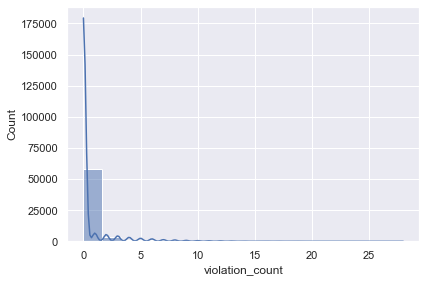

In [77]:
cols_to_plot = 'violation_count'

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))  # 1 row, 2 columns
# for ax, col in zip(axes, cols_to_plot):
sns.histplot(data=df_merge, x=df_merge[cols_to_plot], kde=True)

plt.tight_layout(pad=1)


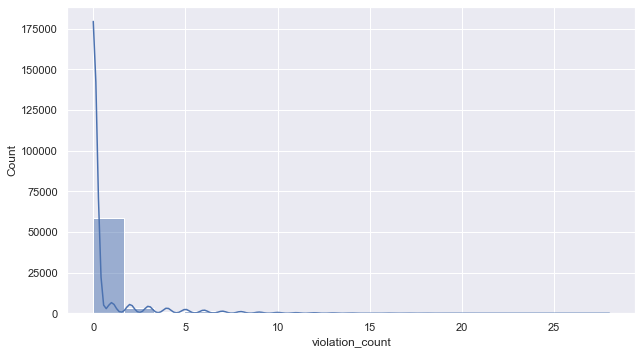

In [78]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.histplot(data=df_merge, x='violation_count', kde=True, ax=ax)
plt.tight_layout(pad=1)


In [79]:
#Heavily skewed 

In [80]:
cols_obj = ['facility_rating_status', 'violation_observed', 'name',
            'analysis_neighborhood', 'inspection_type_clean','has_violation_count', 'has_violation_observed']

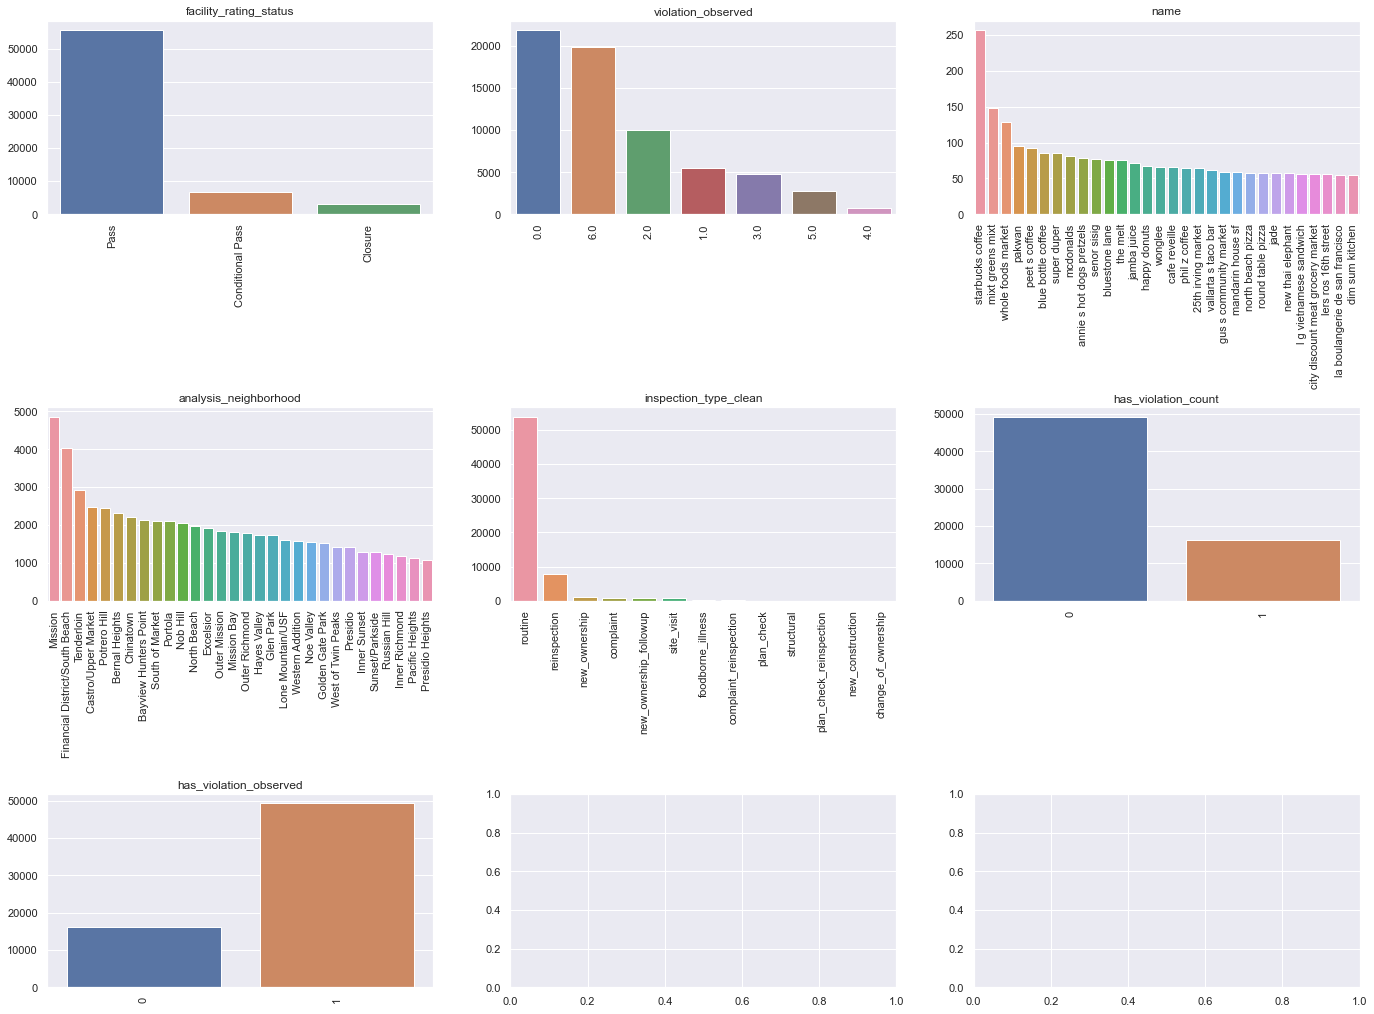

In [81]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, col in enumerate(cols_obj):
    vc = df_merge[col].value_counts().head(30)
    sns.barplot(x=vc.index, y=vc.values, ax=axes[idx])
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].set_title(col)

plt.tight_layout(pad=4)
fig.subplots_adjust(hspace=1, wspace=0.2)


In [82]:
#Facility_status has imbalance. Starbucks coffeee has been the most inspected restaurant. Mission neighbourhood restaurants
#are mostly inspected. 

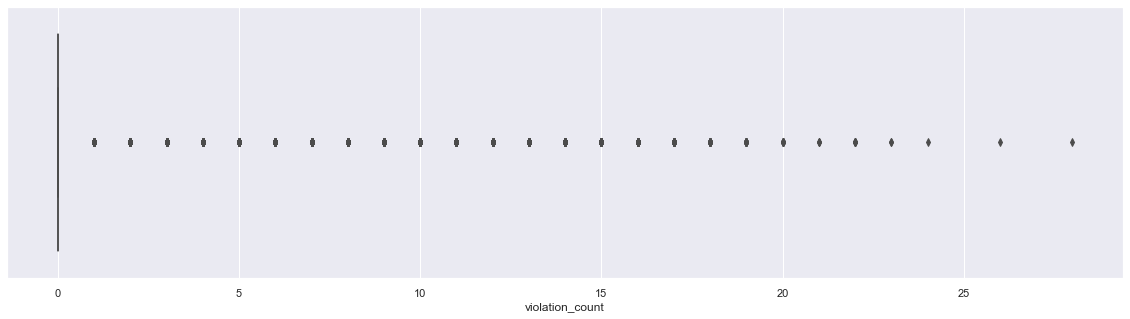

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_merge['violation_count'])
plt.show()

In [84]:
#Expected in a heavily imbalanced dataset.

In [85]:
def barplot_values_percent(ax,wid=0.25,hght=250):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+wid #adjust the numbers (higher numbers = to the right, lower = to the left)
        height = i.get_height()+hght #adjust the numbers (higher numbers = up, lower = down)
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=12,color='black')

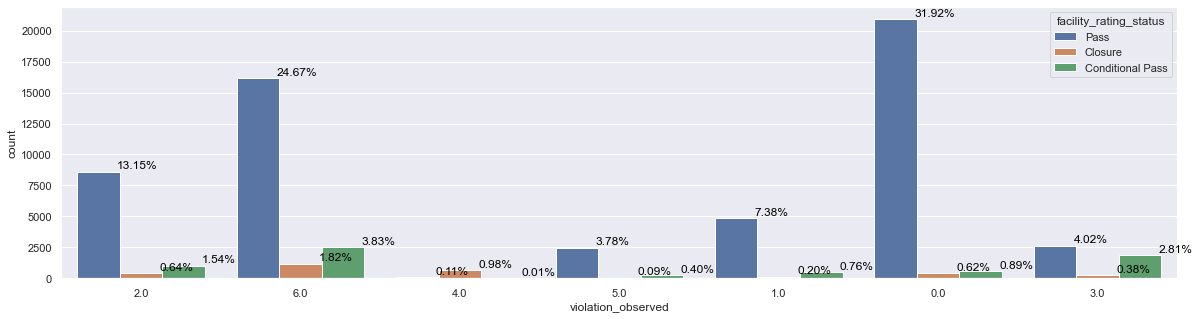

In [86]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data=df_merge,x='violation_observed',hue='facility_rating_status')
barplot_values_percent(ax)

In [87]:
#The closure and conditionalpass are maximum at 6.0 as expected

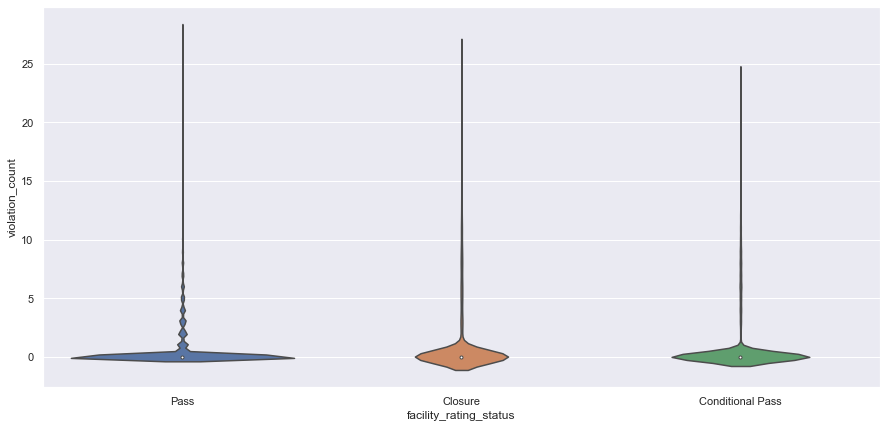

In [88]:
plt.figure(figsize=(15,7))
ax = sns.violinplot(data=df_merge,y='violation_count',x='facility_rating_status')

In [94]:
#There is not much difference in their mean but the number of examples each category 
#has is very different explaining the imbalance

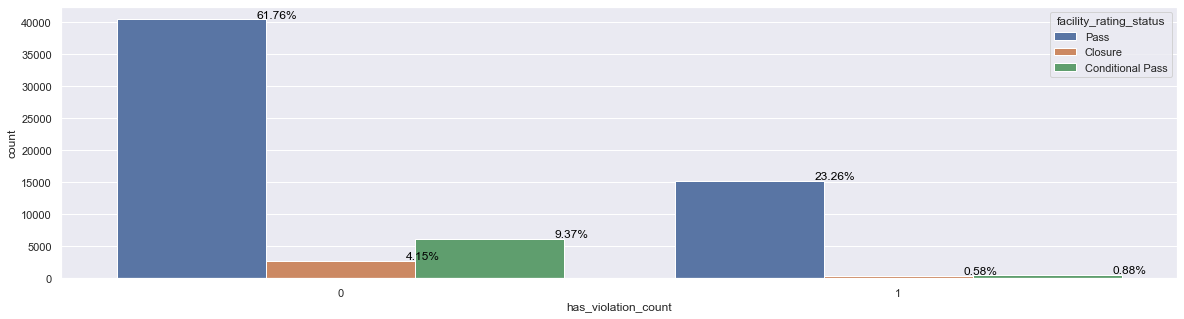

In [90]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data=df_merge,x='has_violation_count',hue='facility_rating_status')
barplot_values_percent(ax)

In [91]:
df_merge

,inspection_date,facility_rating_status,violation_observed,violation_codes,address,name,violation_count,analysis_neighborhood,inspection_type_clean,has_violation_count,has_violation_observed
0,2020-03-09,Pass,2.0,"No insects, rodents, birds or nonservice animals [ date violation corrected: 3/11/2021 ]",306 clement street,blue danube coffee house,0.0,Presidio Heights,routine,0,1
1,2020-03-09,Pass,6.0,"Equipment approved; clean; installed, good repair; capacity [ date violation corrected: 3/11/2021 ]",306 clement street,blue danube coffee house,0.0,Presidio,routine,0,1
2,2020-03-09,Pass,6.0,Premises; personal/cleaning items; vermin proofing [ date violation corrected: 3/11/2021 ],306 clement street,blue danube coffee house,0.0,Outer Richmond,routine,0,1
3,2020-03-09,Closure,4.0,Proper cooling methods [ date violation corrected: 3/9/2020 ],508 haight street,cafe international,0.0,Lone Mountain/USF,routine,0,1
4,2020-03-09,Closure,2.0,Food Safety Manager Certification and Food Handler Card [ date violation corrected: 9/8/2021 ],508 haight street,cafe international,0.0,Seacliff,routine,0,1
...,...,...,...,...,...,...,...,...,...,...,...
65499,2024-08-08,Pass,0.0,"113996, 113998, 114037, 114429, 114429.3, 114429.5 - Keep potentially hazardous foods (PHF) cold at 41Â°F or below or hot held at 135Â°F or above. Immediately discontinue storing PHF at room tempe...",55 cyril magnin street,kin khao thai eatery,5.0,Tenderloin,routine,1,0
65500,2024-08-08,Pass,0.0,,4151 17th street,eureka market,0.0,Castro/Upper Market,new_ownership_followup,1,0
65501,2024-08-08,Pass,0.0,"114115 (b,c) - Maintain nonfood contact surfaces clean. Thoroughly clean and degrease the cooking equipment and shelves above cooking equipment.",1120 4th street,house of tadu ethiopian kitchen,1.0,Mission Bay,routine,1,0
65502,2024-08-08,Pass,0.0,,343 sansome street,manhattan hub,0.0,Financial District/South Beach,reinspection,1,0


In [92]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65504 entries, 0 to 65503
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   inspection_date         65504 non-null  datetime64[ns]
 1   facility_rating_status  65504 non-null  object        
 2   violation_observed      65504 non-null  object        
 3   violation_codes         65504 non-null  object        
 4   address                 65504 non-null  object        
 5   name                    65504 non-null  object        
 6   violation_count         65504 non-null  float64       
 7   analysis_neighborhood   65504 non-null  object        
 8   inspection_type_clean   65504 non-null  object        
 9   has_violation_count     65504 non-null  int32         
 10  has_violation_observed  65504 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(7)
memory usage: 5.0+ MB


In [93]:
#Saving the dataset

df_merge.to_csv('../data/clean/Merged_non_null_dataset.csv', index=False)

